# Sampling and Descriptive Statistics (Basic)

### Introduction


The following dataset contains information about sleep patterns of a group of university students.

The data comes from the following [Kaggle link](https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency). This dataset contains information related to sleep efficiency, age, gender, as well as other variables:

- ID: Unique student identifier.
- Gender: Student's gender (Female/Male).
- Age: Student's age.
- Sleep duration: the student's total sleep time (in hours).
- Sleep efficiency: measure of the proportion of time spent sleeping in bed.
- REM sleep percentage: the percentage of total sleep time dedicated to REM sleep.
- Awakenings: the number of times the student wakes up during the night.
- Caffeine consumption: the amount of caffeine consumed in the 24 hours prior to going to bed (in mg).
- Alcohol consumption: the amount of alcohol consumed in the 24 hours prior to going to bed (in ml).
- Smoking status: whether the student smokes or not.


In this notebook we are going to apply some basic sampling and descriptive statistics.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Basic exploration

In [2]:
# Load dataset
df = pd.read_csv('data/data_statistics.csv')

In [3]:
# Shape
df.shape

(452, 10)

In [4]:
# First 5 rows
df.head()

,ID,Age,Gender,Sleep.duration,Sleep.efficiency,REM.sleep.percentage,Awakenings,Caffeine.consumption,Alcohol.consumption,Smoking.status
0,1,65,Female,6.0,0.88,18,0.0,0.0,0.0,Yes
1,2,69,Male,7.0,0.66,19,3.0,0.0,3.0,Yes
2,3,40,Female,8.0,0.89,20,1.0,0.0,0.0,No
3,4,40,Female,6.0,0.51,23,3.0,50.0,5.0,Yes
4,5,57,Male,8.0,0.76,27,3.0,0.0,3.0,No


In [5]:
# Last 5 rows
df.tail()

,ID,Age,Gender,Sleep.duration,Sleep.efficiency,REM.sleep.percentage,Awakenings,Caffeine.consumption,Alcohol.consumption,Smoking.status
447,448,27,Female,7.5,0.91,22,0.0,0.0,0.0,No
448,449,52,Male,6.0,0.74,28,4.0,25.0,0.0,No
449,450,40,Female,8.5,0.55,20,1.0,NaN,3.0,Yes
450,451,45,Male,7.0,0.76,18,3.0,0.0,0.0,No
451,452,18,Male,7.5,0.63,22,1.0,50.0,0.0,No


In [6]:
# Column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    452 non-null    int64  
 1   Age                   452 non-null    int64  
 2   Gender                452 non-null    object 
 3   Sleep.duration        452 non-null    float64
 4   Sleep.efficiency      452 non-null    float64
 5   REM.sleep.percentage  452 non-null    int64  
 6   Awakenings            432 non-null    float64
 7   Caffeine.consumption  427 non-null    float64
 8   Alcohol.consumption   438 non-null    float64
 9   Smoking.status        452 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 35.4+ KB


In [7]:
# Basic statistics
df.describe()

,ID,Age,Sleep.duration,Sleep.efficiency,REM.sleep.percentage,Awakenings,Caffeine.consumption,Alcohol.consumption
count,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,1.641204,23.653396,1.173516
std,130.625419,13.172250,0.866625,0.135237,3.525963,1.356762,30.202785,1.621377
min,1.000000,9.000000,5.000000,0.500000,15.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,1.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,1.000000,25.000000,0.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,3.000000,50.000000,2.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,4.000000,200.000000,5.000000


In [8]:
# Checking missing values
df.isnull().sum()

ID                       0
Age                      0
Gender                   0
Sleep.duration           0
Sleep.efficiency         0
REM.sleep.percentage     0
Awakenings              20
Caffeine.consumption    25
Alcohol.consumption     14
Smoking.status           0
dtype: int64

In [9]:
# Summary of 'Sleep efficiency' column
df['Sleep.efficiency'].describe()

count    452.000000
mean       0.788916
std        0.135237
min        0.500000
25%        0.697500
50%        0.820000
75%        0.900000
max        0.990000
Name: Sleep.efficiency, dtype: float64

Summary for non-smokers:
 count    298.000000
mean       0.817081
std        0.109384
min        0.520000
25%        0.730000
50%        0.840000
75%        0.910000
max        0.990000
Name: Sleep.efficiency, dtype: float64

Summary for smokers:
 count    154.000000
mean       0.734416
std        0.161711
min        0.500000
25%        0.550000
50%        0.780000
75%        0.880000
max        0.970000
Name: Sleep.efficiency, dtype: float64


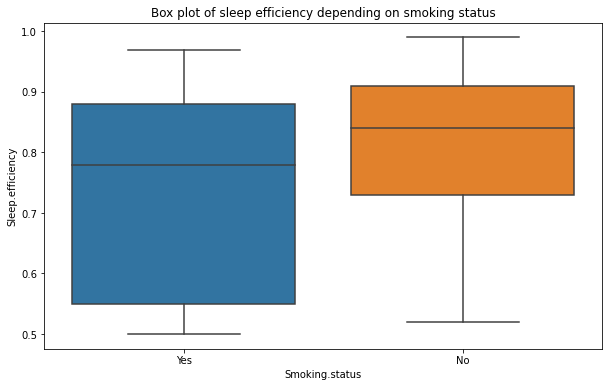

In [10]:
# Numerical summaries of the "Sleep efficiency" variable
summary_non_smokers = df[df['Smoking.status'] == 'No']['Sleep.efficiency'].describe()
summary_smokers = df[df['Smoking.status'] == 'Yes']['Sleep.efficiency'].describe()

print("Summary for non-smokers:\n", summary_non_smokers)
print("\nSummary for smokers:\n", summary_smokers)

# Box plot
plt.figure(figsize=(10,6))
sns.boxplot(x="Smoking.status", y="Sleep.efficiency", data=df)
plt.title('Box plot of sleep efficiency depending on smoking status')

# Saving the figure
plt.savefig('figures/sleep_efficiency_boxplot.png')


plt.show()

**Insights**

The median sleep efficiency is higher for "non-smokers" (0.84) than for "smokers" (0.78). The mean is also higher in the "non-smokers" group (0.81) compared to "smokers" (0.73). At first glance, no outliers are seen, and these appear to be asymmetric distributions (they do not seem to be normal distributions). Initially, then, differences are observed between smokers / non-smokers with respect to sleep efficiency.

### 2. Basic sampling

In [11]:
# Summary of 'Gender' values
df['Gender'].value_counts()

Male      228
Female    224
Name: Gender, dtype: int64

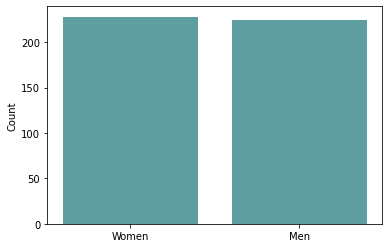

In [12]:
# Setting color and labels
counts = df['Gender'].value_counts()
colors = ['cadetblue'] 
labels = ['Women', 'Men'] 

# Creating the bar plot
plt.bar(labels, counts, color=colors)
plt.ylabel('Count')

# Saving the figure
plt.savefig('figures/gender_value_counts.png')


plt.show()

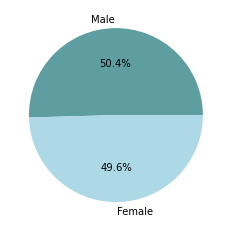

In [13]:
# Setting color
colors = ['cadetblue', 'lightblue']

# Creating the pie chart
plt.pie(counts, colors=colors, labels=counts.index, autopct='%1.1f%%')

# Saving the figure
plt.savefig('figures/pie_gender.png')


plt.show()

As we can see in the frequency tables and in the graphics, there are 224 people who are "Female", that is, 49.56% of the data. There are 228 people who are "Male", which is 50.44% of the data.

**If a university has 1000 classes and in each class, five students are randomly selected to analyze their sleep pattern. What sampling method do we use in this case and why?**

In this case, it would be stratified sampling, since the individuals in the population are divided into disjoint groups (strata); which would be each class. The sample is obtained by selecting a simple random sample within each stratum, in this case of 5 people per class.

### 3. Basic use case

The new intern at the company has been tasked with reviewing the entire dataset, row by row, data by data. As this is a boring task, he has decided to try his luck and only review the data for rows 100 to 280, and then claim that he has reviewed them all. Answer the following questions related to these data:

a) Make a histogram of the Sleep efficiency variable using the data between rows 100 and 280.

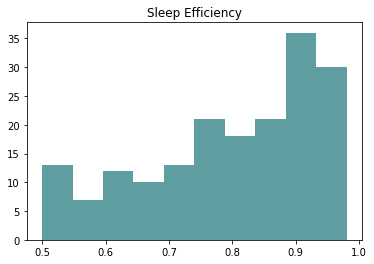

In [14]:
subset = df.iloc[99:280]
plt.hist(subset['Sleep.efficiency'], color='cadetblue')
plt.title('Sleep Efficiency')
plt.savefig('figures/sleep_efficiency_hist.png')
plt.show()

**Insights**

We see that it is a variable with a distribution that is skewed to the left, and without outliers.

**When should one choose a bar chart over a histogram?**

Bar charts are for multiple (categorical) variables, while histograms are for a single quantitative variable.


**With these same data, who is the person with the highest sleep efficiency?**

In [15]:
# Let´s show in the output only the person's ID, age and gender.
max_efficiency = subset['Sleep.efficiency'].max()
max_efficiency

0.98

In [16]:
max_efficiency_row = subset.loc[subset['Sleep.efficiency'] == max_efficiency, ['ID', 'Age', 'Gender']]
max_efficiency_row

,ID,Age,Gender
206,207,31,Female


**Insights**

The maximum value is 0.98, and corresponds to ID 207, Female gender and age of 31.